<a href="https://colab.research.google.com/github/LeilaMo/Machine_Learning_Toturials/blob/main/Deep_Learning_CombinedCyclePowerPlantDataSet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combined Cycle Power Plant Data Set - Deep Learning



## Part 1 - Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
tf.__version__

'2.3.0'

## Part 2 - Importing the Data Set

In [ ]:
df = pd.read_excel ("Folds5x2_pp.xlsx")

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


###Data Set Information:

This data set is taken from UCI Machine Learning Repository.
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load.


A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, The other three of the ambient variables effect the GT performance. For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing. We provide the data both in .ods and in .xlsx formats.

the link to the data set: http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#

Attribute Information:

The features consist of hourly average ambient variables 
- T : Temperature (T) in the range 1.81°C and 37.11°C,
- AP : Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- RH : Relative Humidity (RH) in the range 25.56% to 100.16%
- V : Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- EP : Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. 
The variables are given without normalization.



## Part 3 -  Preprocessing

### Exploring the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


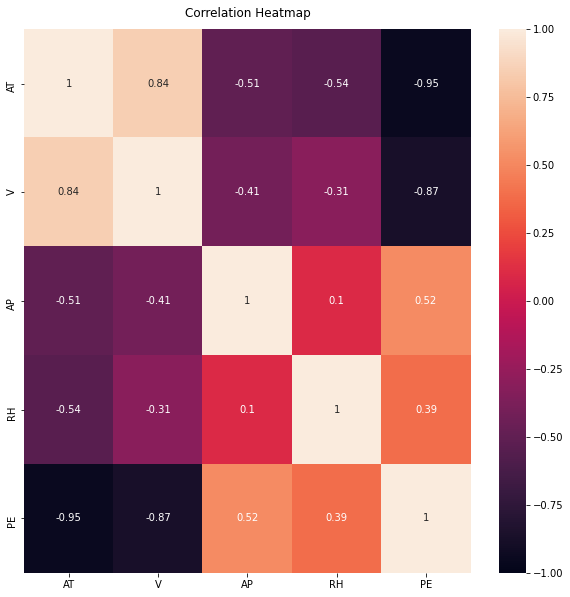

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

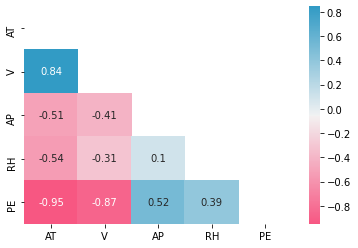

In [ ]:
matrix = np.triu(df.corr())
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap= cmap)

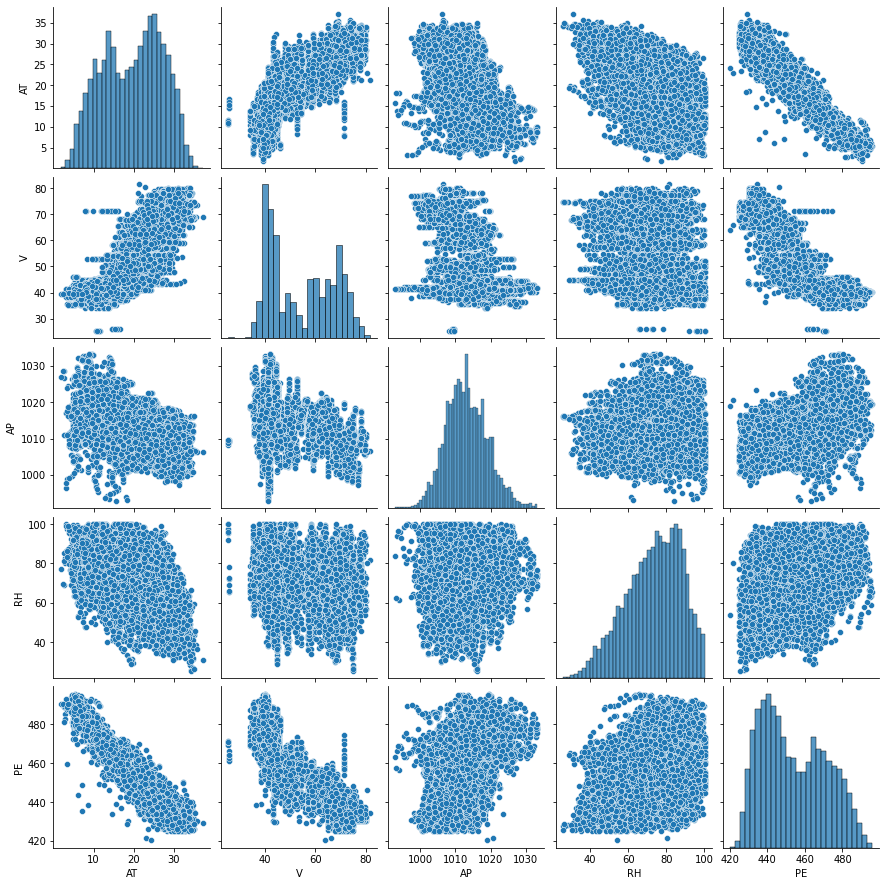

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


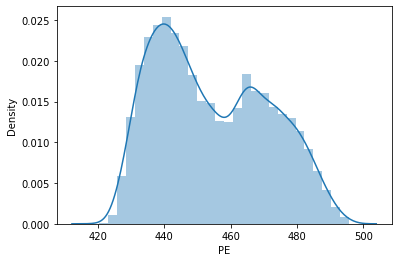

In [ ]:
sns.distplot(df['PE'])

### Splitting the X and Y Variables

In [ ]:
x = df.iloc[ : , : -1]
y = df.iloc[ : , -1]

### Splitting the Training and the Test Sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y , test_size = 0.2, random_state = 0)

## Part 4 - Bulding the ANN

### Initalizing the ANN

The first layer is always the input features. 

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the first layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units= 6, activation="relu"))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units= 6, activation="relu"))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units= 1))

### Part 4 - Training the ANN

#### Compiling the ANN

In [ ]:
ann.compile(optimizer = "adam", loss = "mean_squared_error", metrics=['accuracy'])

#### Training the Model on the training set

In [ ]:
history = ann.fit(x_train, y_train, batch_size=32, epochs= 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

240/240 [==============================] - 0s 1ms/step - loss: 312.0062 - accuracy: 0.0000e+00
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 190.9391 - accuracy: 0.0000e+00
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 150.8625 - accuracy: 0.0000e+00
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 91.4203 - accuracy: 0.0000e+00
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 51.533

### Part 5 -  Predicting the Results

In [ ]:
y_pred = ann.predict(x_test)

In [ ]:
history

In [ ]:
loss_train = history.history['loss']

In [ ]:
len (loss_train)

100

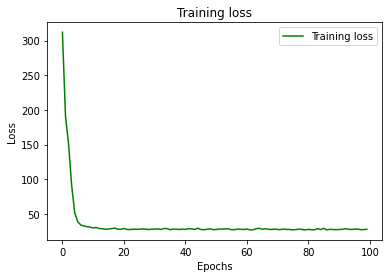

In [ ]:
loss_train = history.history['loss']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part 5 - Evaluation

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

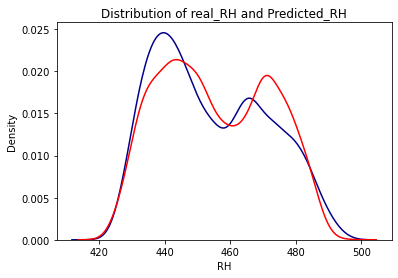

In [ ]:
sns.distplot(y_train, hist = False, kde = True,
             color = 'darkblue')

sns.distplot(ann.predict(x_train), hist = False, kde = True,
             color = 'red')
# Plot formatting
plt.title('Distribution of real_RH and Predicted_RH')
plt.xlabel('RH')
plt.ylabel('Density')

In [ ]:
print('Mean_Absolute_Error: ', metrics.mean_absolute_error(y_test, y_pred), "\n",
      "Mean_Squared_Error: " , metrics.mean_squared_error(y_test, y_pred),  "\n",
      "RootMeanSquaredError:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)),  "\n",
      "R2: ", metrics.r2_score(y_test, y_pred))

Mean_Absolute_Error:  4.114492193877759 
 Mean_Squared_Error:  26.17055501461796 
 RootMeanSquaredError: 5.115716471289037 
 R2:  0.9105242959261227
